In [16]:
from google.colab import drive
drive.mount( "/content/drive"  )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
import re
import glob
import cv2
from os.path import join
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D

In [18]:
""" 
Get the Data folders
"""
papers = "/content/drive/My Drive/Artificial NeuralNetwork/rockpaperscissors/paper"

rocks = "/content/drive/My Drive/Artificial NeuralNetwork/rockpaperscissors/rock"

scissors = "/content/drive/My Drive/Artificial NeuralNetwork/rockpaperscissors/scissors"

print("Total Papers : {} rocks : {} scissors {} " .format( len(os.listdir(papers)),
                                                           len(os.listdir(rocks)),
                                                           len(os.listdir(scissors))  
                                                           ))
"""

Create The Train Val Folders 

"""
ThePath = "/content/drive/My Drive/Artificial NeuralNetwork"
dirs = os.listdir("/content/drive/My Drive/Artificial NeuralNetwork/rockpaperscissors/")
label = 0
im_arr = []
lb_arr = []
X = []
Y = []
count=0
for i in dirs:
  count=0
  for pic in glob.glob(ThePath +"/rockpaperscissors/" + i +"/*.png"):
    #print(pic)
    image = cv2.imread(pic)
    image = cv2.resize(image,(70,70))
    image = np.array(image)
    X.append(image)
    
    if( i == "paper" ):
      Y.append(0)
    elif( i == "rock"):
      Y.append(1)
    else:
      Y.append(2)  




Total Papers : 712 rocks : 726 scissors 750 


In [19]:


from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
Xarr = np.array(X)
Yarr = np.array(Y)
x_train,x_test,y_train,y_test=train_test_split(Xarr,Yarr,test_size=0.3)
x_train = x_train.astype('float32')
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train , 3)
y_test = to_categorical(y_test, 3)
print(y_test)

##CNN Architecture
model=Sequential()
model.add(Conv2D( 32 ,kernel_size = (3,3),
                 activation  = 'relu',
                 input_shape = (70,70,3) ) )
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D( 32, kernel_size = (3,3) ,
                 activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(3,activation="softmax"))

from tensorflow.keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.80, decay=decay, nesterov=False) #Stocasthic gradient descent Setting
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
print(model.summary())

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


y_pred=model.predict(x_test)

y_prediction_n = []
y_test_n = []

for i in range(len(y_pred)):
  max_pred = max(y_pred[i])
  max_test = max(y_test[i])
  index_pred = [index_pred for index_pred,j in enumerate(y_pred[i]) if j == max_pred ]
  index_test = [index_test for index_test,j in enumerate(y_test[i]) if j == max_test ]
  y_prediction_n.append(index_pred)
  y_test_n.append(index_test)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________________________________________

In [0]:
import pandas as pd
from seaborn import heatmap
def Plot_Classification_report( cr , title ,cmap):
  lines = cr.split("\n")
  classes=[]
  plot=[]
  
  for line in lines[ 2:(len(lines)-3)]:
    t = line.split()
    if(t!=[] ):
      if(t[0] != 'accuracy'):
        classes.append(t[0])
        v=[float(numb) for numb in t[ 1 : 4 ] ]
        plot.append(v)
      else:
        print("Accuracy" ,t[1])  

  plt.xticks([1,2])   
  plt.title(title)
  plt.ylabel("Classes")
  plt.xlabel("Measures")   
  heatmap(plot,cmap=cmap,annot=True)
  x_tick_marks = np.arange(3)
  y_tick_marks = np.arange(len(classes))
  plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'],horizontalalignment='left')
  plt.yticks(y_tick_marks, classes)
  plt.show()
  
 

Accuracy 0.97


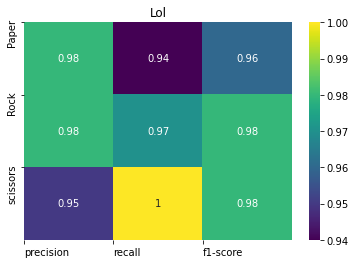

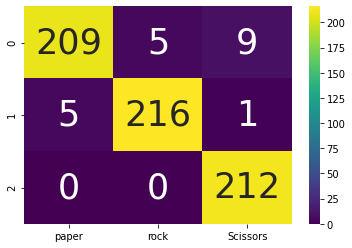

In [21]:

from sklearn.metrics import classification_report
cr=classification_report(y_test_n, y_prediction_n, target_names=["Paper","Rock","scissors"])
Plot_Classification_report(cr,"Lol","viridis")
matrix=pd.DataFrame(confusion_matrix(y_test_n,y_prediction_n),columns=["paper","rock","Scissors"])
heatmap(data=matrix,cmap="viridis",annot=True \
            ,fmt=".0f",annot_kws={"size":35},)

In [0]:
model.save("/content/drive/My Drive/MOdels/RockpapersJoke.h5")

Saving IMG_20200526_134017.jpg to IMG_20200526_134017 (11).jpg
Saving IMG_20200526_134022.jpg to IMG_20200526_134022 (6).jpg
Saving IMG_20200526_125648.jpg to IMG_20200526_125648 (5).jpg
Saving IMG_20200526_125653.jpg to IMG_20200526_125653 (8).jpg
rock


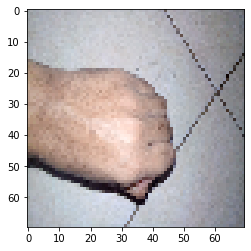

scissors


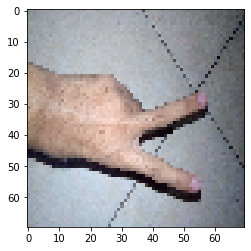

scissors


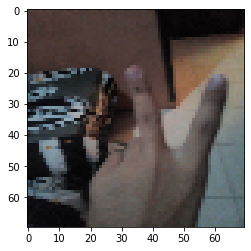

paper


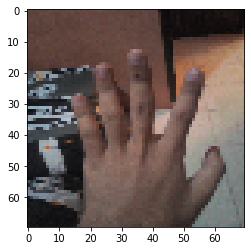

In [25]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  images=image.load_img(path,target_size=(70,70))
  x = np.array(images)
  x = np.expand_dims(x,axis=0)
  classes = model.predict(x,batch_size=32)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  else:
   print("scissors")  
  plt.imshow(images)
  plt.show() 